# Student Performance vs Funding

#### Data sources: https://www.kaggle.com/noriuk/us-educational-finances?select=states.csv

### Import Dependencies and Setup for the analyze

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# Study data files paths
average_scores_path = "naep.csv"
fed_revenue_path = "states.csv"

# Read the score data and the revenue results
scores_data = pd.read_csv(average_scores_path)
revenue_data = pd.read_csv(fed_revenue_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(scores_data, revenue_data, how='inner', \
                          left_on=['STATE','YEAR'], right_on=['STATE', 'YEAR'])

# Display the data table for preview
merged_data_df

# output file (csv)
output_data_file = "clean_math_8.csv"
output_data_file = "clean_reading_8.csv"
output_data_file = "clean_math_4.csv"
output_data_file = "clean_reading_4.csv"

In [2]:
# Group merged data by the test subject
test_subject = merged_data_df.groupby(['TEST_SUBJECT'])
test_subject.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,2015,Alabama,230.9774227,Mathematics,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
2,2015,Alabama,217.0490898,Reading,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
3,2015,Alabama,258.7537615,Reading,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
5,2015,Alaska,280.4934562,Mathematics,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
6,2015,Alaska,212.7926002,Reading,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
7,2015,Alaska,260.3170188,Reading,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
8,2015,Arizona,237.6117554,Mathematics,4,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662
10,2015,Arizona,215.3113365,Reading,4,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662


### Reveune and Spending analysis

In [3]:
# Total Reveune and Spending
year_2015 = merged_data_df[(merged_data_df['YEAR'] == 2015)]
year_2015["AVG_SCORE"] = year_2015["AVG_SCORE"].astype(float)
# year_2015.head()

year_2015 = year_2015.drop(columns=['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 
                              'TOTAL_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',
                             'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE'])
year_2015.head()

<ipython-input-3-ec5796145e26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2015["AVG_SCORE"] = year_2015["AVG_SCORE"].astype(float)


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610


In [4]:
# Statistics for total revenue
total_rev = year_2015['TOTAL_REVENUE'].agg(['mean', 'median', 'var', 'std', 'sem'])
total_rev

mean      1.281705e+07
median    7.548871e+06
var       2.436156e+14
std       1.560819e+07
sem       1.092792e+06
Name: TOTAL_REVENUE, dtype: float64

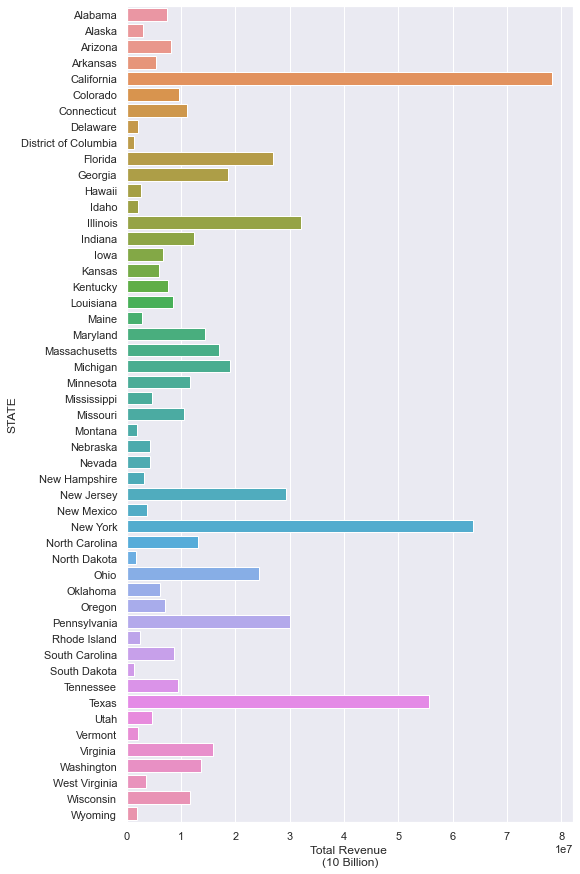

In [5]:
# Total revenue in each State in 2015, presenting in barplot
# Note: The total revenue is the same regardless the grade or subject

sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize=(8, 15))
              
sns.barplot(x ='TOTAL_REVENUE', y ='STATE', data = year_2015)
ax.set(xlabel = "Total Revenue \n(10 Billion)")

plt.savefig("Total Revenue by State.png")

In [6]:
# Calculate the Instructional spending per Student for 2015
# Note: The instructional expenditure is the same regardless the grade or subject

spending_per_student = round((year_2015['INSTRUCTION_EXPENDITURE']*1000)/year_2015['ENROLL'],2)
# spending_per_student.head()

year_2015['Instructional spending per Student'] = spending_per_student
year_2015.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,Instructional spending per Student
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479,5194.03
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479,5194.03
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479,5194.03
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479,5194.03
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610,11354.14


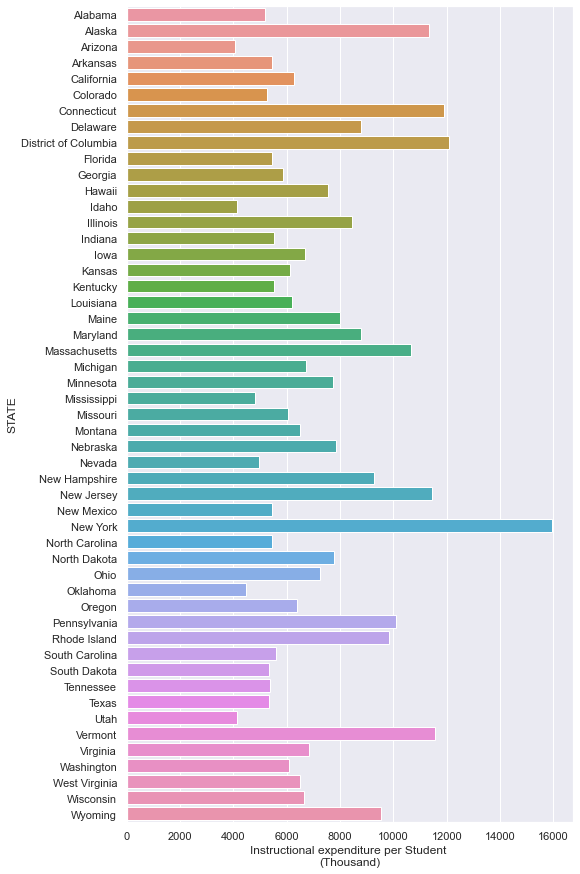

In [7]:
# Instructional expenditure in each State in 2015, presenting in barplot

sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize=(8, 15))
              
sns.barplot(x ='Instructional spending per Student', y ='STATE', data = year_2015)
ax.set(xlabel = "Instructional expenditure per Student \n(Thousand)")

plt.savefig("Instructional spending per student by State.png")

#### Get the following dataframes:
* 2015 4th grade Math
* 2015 8th grade Math
* 2015 4th grade Reading
* 2015 8th grade Reading

In [8]:
# For 2015 4th grade Math data

math = year_2015[year_2015['TEST_SUBJECT'] == 'Mathematics']

grade_4_math = math[math['TEST_YEAR'] == 4]

# Covert the type of the Average scores
grade_4_math["AVG_SCORE"] = grade_4_math["AVG_SCORE"].astype(float)
grade_4_math.head()

<ipython-input-8-4bd5eda34c80>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_4_math["AVG_SCORE"] = grade_4_math["AVG_SCORE"].astype(float)


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,Instructional spending per Student
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479,5194.03
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610,11354.14
8,2015,Arizona,237.611755,Mathematics,4,944978.0,8230507,3846357,4070.31
12,2015,Arkansas,235.215470,Mathematics,4,479682.0,5308625,2620399,5462.78
16,2015,California,231.549345,Mathematics,4,6226523.0,78248042,38951948,6255.81


In [9]:
# For 2015 8th grade Math data

math = year_2015[year_2015['TEST_SUBJECT'] == 'Mathematics']

grade_8_math = math[math['TEST_YEAR'] == 8]

# Covert the type of the Average scores
grade_8_math["AVG_SCORE"] = grade_8_math["AVG_SCORE"].astype(float)
grade_8_math.head()

<ipython-input-9-9308936bfb80>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_8_math["AVG_SCORE"] = grade_8_math["AVG_SCORE"].astype(float)


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,Instructional spending per Student
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479,5194.03
5,2015,Alaska,280.493456,Mathematics,8,130755.0,2920986,1484610,11354.14
9,2015,Arizona,282.919489,Mathematics,8,944978.0,8230507,3846357,4070.31
13,2015,Arkansas,275.064756,Mathematics,8,479682.0,5308625,2620399,5462.78
17,2015,California,275.324573,Mathematics,8,6226523.0,78248042,38951948,6255.81


In [10]:
# For 2015 4th grade Reading data

reading = year_2015[year_2015['TEST_SUBJECT'] == 'Reading']
# Math
grade_4_reading = reading[reading['TEST_YEAR'] == 4]

grade_4_reading["AVG_SCORE"] = grade_4_reading["AVG_SCORE"].astype(float)
grade_4_reading.head()

<ipython-input-10-781cd0c425d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_4_reading["AVG_SCORE"] = grade_4_reading["AVG_SCORE"].astype(float)


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,Instructional spending per Student
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479,5194.03
6,2015,Alaska,212.792600,Reading,4,130755.0,2920986,1484610,11354.14
10,2015,Arizona,215.311337,Reading,4,944978.0,8230507,3846357,4070.31
14,2015,Arkansas,218.077496,Reading,4,479682.0,5308625,2620399,5462.78
18,2015,California,212.677949,Reading,4,6226523.0,78248042,38951948,6255.81


In [11]:
# For 2015 8th grade Reading data

reading = year_2015[year_2015['TEST_SUBJECT'] == 'Reading']
# Math
grade_8_reading = reading[reading['TEST_YEAR'] == 8]

grade_8_reading["AVG_SCORE"] = grade_8_reading["AVG_SCORE"].astype(float)
grade_8_reading.head()

<ipython-input-11-6266c63cd222>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_8_reading["AVG_SCORE"] = grade_8_reading["AVG_SCORE"].astype(float)


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,Instructional spending per Student
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479,5194.03
7,2015,Alaska,260.317019,Reading,8,130755.0,2920986,1484610,11354.14
11,2015,Arizona,262.769392,Reading,8,944978.0,8230507,3846357,4070.31
15,2015,Arkansas,258.768268,Reading,8,479682.0,5308625,2620399,5462.78
19,2015,California,258.986843,Reading,8,6226523.0,78248042,38951948,6255.81


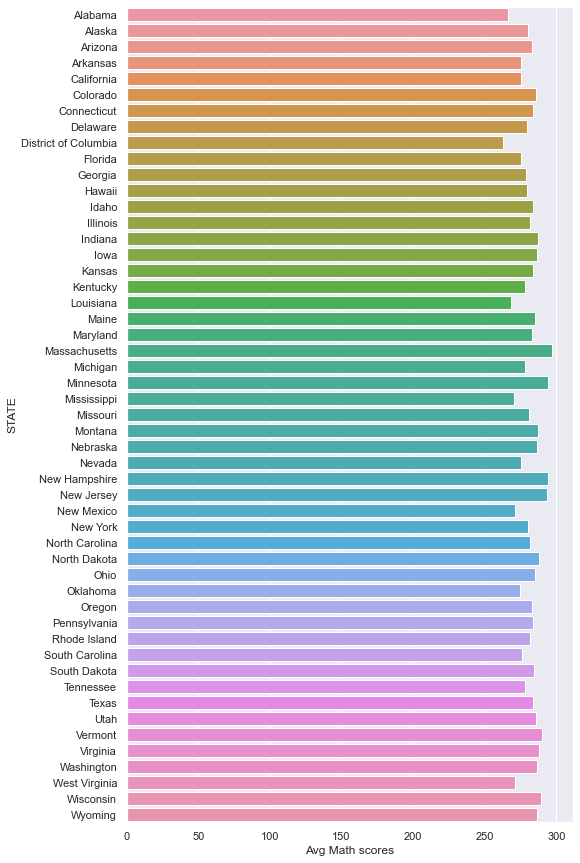

In [23]:
# Barplot to show the Avg math scores in each State in 2015
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize=(8, 15))
              
sns.barplot(x ='AVG_SCORE', y ='STATE', data = grade_8_math)
ax.set(xlabel = "Avg Math scores")

plt.savefig("Average Math Scores by State.png")

### Total revenue vs scores

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='AVG_SCORE'>

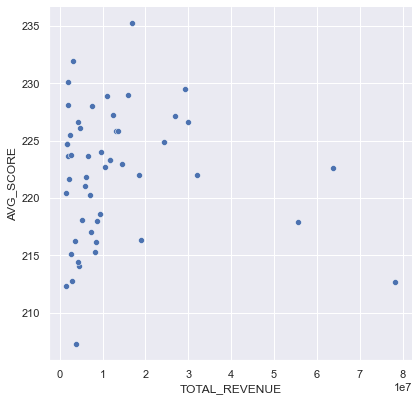

In [13]:
# Total Revenue vs 4th grade Reading scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (6.5, 6.5))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "TOTAL_REVENUE", y = "AVG_SCORE",
                sizes = (1, 8), data = grade_4_reading, ax = ax)

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='AVG_SCORE'>

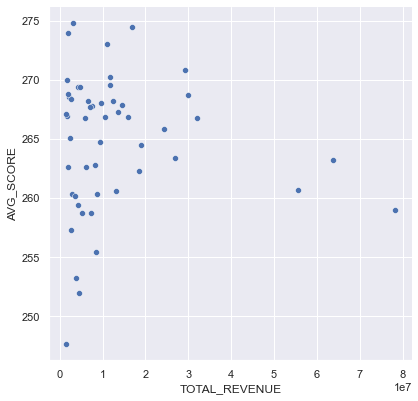

In [14]:
# Total Revenue vs 8th grade Reading scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (6.5, 6.5))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "TOTAL_REVENUE", y = "AVG_SCORE",
                sizes = (1, 8), data = grade_8_reading, ax = ax)

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='AVG_SCORE'>

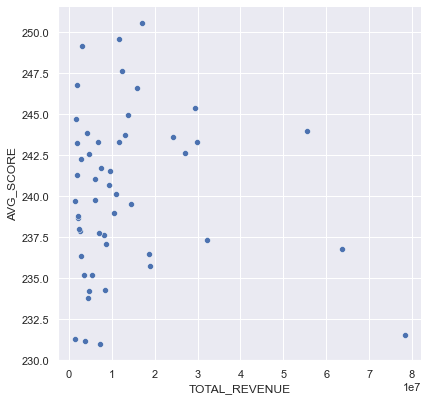

In [15]:
# Total Revenue vs 4th grade Math scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (6.5, 6.5))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "TOTAL_REVENUE", y = "AVG_SCORE",
                sizes = (1, 8), data = grade_4_math, ax = ax)

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='AVG_SCORE'>

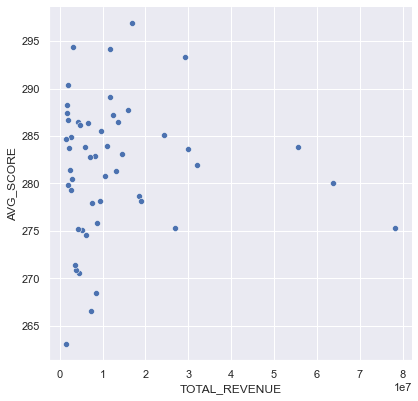

In [16]:
# Total Revenue vs 8th grade Math scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (6.5, 6.5))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "TOTAL_REVENUE", y = "AVG_SCORE",
                sizes = (1, 8), data = grade_8_math, ax = ax)

<AxesSubplot:xlabel='Instructional spending per Student', ylabel='AVG_SCORE'>

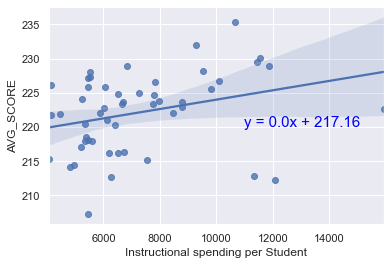

In [17]:
# Linear regression for 4th grade Reading vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_4_reading["Instructional spending per Student"],\
                                                               grade_4_reading["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (11000, 220), fontsize = 15, color = 'blue')

sns.regplot(data = grade_4_reading, x = "Instructional spending per Student", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

<AxesSubplot:xlabel='Instructional spending per Student', ylabel='AVG_SCORE'>

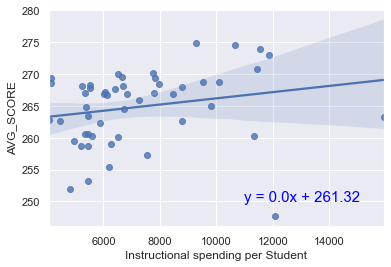

In [18]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_8_reading["Instructional spending per Student"],\
                                                               grade_8_reading["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (11000, 250), fontsize = 15, color = 'blue')

sns.regplot(data = grade_8_reading, x = "Instructional spending per Student", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

<AxesSubplot:xlabel='Instructional spending per Student', ylabel='AVG_SCORE'>

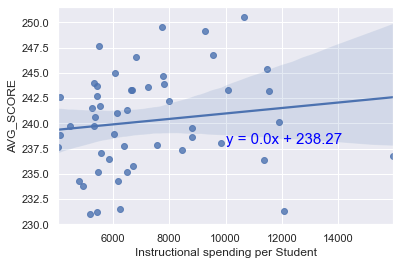

In [22]:
# Linear regression for 4th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_4_math["Instructional spending per Student"],\
                                                               grade_4_math["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (10000, 238), fontsize = 15, color = 'blue')

sns.regplot(data = grade_4_math, x = "Instructional spending per Student", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

<AxesSubplot:xlabel='Instructional spending per Student', ylabel='AVG_SCORE'>

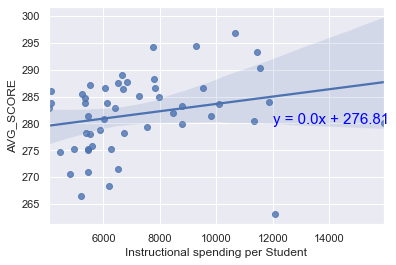

In [20]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_8_math["Instructional spending per Student"],\
                                                               grade_8_math["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12000, 280), fontsize = 15, color = 'blue')

sns.regplot(data = grade_8_math, x = "Instructional spending per Student", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

In [21]:
grade_8_math.to_csv('clean_math_8.csv', index=False, header=True)
grade_8_reading.to_csv('clean_reading_8.csv', index=False, header=True)
grade_4_math.to_csv('clean_math_4.csv', index=False, header=True)
grade_4_reading.to_csv('clean_reading_4.csv', index=False, header=True)